<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [64]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat

  Using cached yfinance-0.2.38-py2.py3-none-any.whl (72 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.67
    Uninstalling yfinance-0.1.67:
      Successfully uninstalled yfinance-0.1.67
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbconvert 7.4.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
ERROR: Ignored the following versions that require a different python version: 1.4.0 Requires-Python >=3.8; 1.4.0rc0 Requires-Python >=3.8; 1.4.1 Requires-Python >=3.8; 1.4.2 Requires-Python >=3.8; 1.4.3 Requires-Python >=3.8; 1.4.4 Requires-P

In [65]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Using cached yfinance-0.1.67-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.38
    Uninstalling yfinance-0.2.38:
      Successfully uninstalled yfinance-0.2.38

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
   

In [66]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [67]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [68]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()



Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [69]:
Tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [70]:
 tesla_data = Tesla.history(period='max')
tesla_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2024-06-24,184.970001,188.800003,182.550003,182.580002,61992100,0,0.0
2024-06-25,184.399994,187.970001,182.009995,187.350006,63678300,0,0.0
2024-06-26,186.539993,197.759995,186.360001,196.369995,95737100,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [71]:




tesla_data.reset_index(inplace=True)


In [72]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [73]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [74]:
import pandas as pd

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Use the read_html function to extract tables
tables = pd.read_html(url)

# Find the table with Tesla Quarterly Revenue
for table in tables:
    if "Tesla Quarterly Revenue" in table.to_string():
        tesla_revenue = table
        break

# Rename the columns
tesla_revenue.columns = ["Date", "Revenue"]

# Display the DataFrame
print(tesla_revenue.head())



         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [75]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [76]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [77]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [78]:
gme = yf.Ticker('GME')

In [79]:
gme_data = gme.history(period='max')
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-24,23.260000,24.830000,23.240000,23.650000,22162900,0.0,0.0
2024-06-25,23.600000,24.969999,22.549999,24.930000,27625600,0.0,0.0
2024-06-26,24.600000,25.379999,24.040001,24.200001,17903000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [80]:
gme_data.reset_index(inplace=True)

In [81]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [82]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [83]:
from bs4 import BeautifulSoup

# Example HTML content
html_content = """
<html>
<head>
    <title>Sample HTML Page</title>
</head>
<body>
    <h1>Hello, Beautiful Soup!</h1>
    <p>This is a sample paragraph.</p>
    <ul>
        <li>Item 1</li>
        <li>Item 2</li>
        <li>Item 3</li>
    </ul>
</body>
</html>
"""

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Example: Extracting the title
title = soup.title
print(f"Title: {title.text if title else 'No title found'}")

# Example: Extracting paragraphs
paragraphs = soup.find_all('p')
for index, p in enumerate(paragraphs, start=1):
    print(f"Paragraph {index}: {p.text}")

# Example: Extracting list items
list_items = soup.find_all('li')
for index, li in enumerate(list_items, start=1):
    print(f"List Item {index}: {li.text}")


Title: Sample HTML Page
Paragraph 1: This is a sample paragraph.
List Item 1: Item 1
List Item 2: Item 2
List Item 3: Item 3


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [84]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Fetch the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html" 
response = requests.get(url)
html_content = response.text

# Parse HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing GameStop revenue data
tables = soup.find_all('tbody')

# Assuming the table of interest is at index 1
if len(tables) > 1:
    table = tables[1]  # Adjust index as per your specific HTML structure

    # Initialize lists to store data
    dates = []
    revenues = []

    # Extract rows from the table
    rows = table.find_all('tr')

    # Iterate through each row and extract data
    for row in rows:
        cols = row.find_all('td')

        if len(cols) >= 2:  # Ensure columns are present
            # Extract Date and Revenue (adjust column index based on actual structure)
            date = cols[0].text.strip()
            revenue_str = cols[1].text.strip()
            
            # Remove commas and dollar signs from Revenue and convert to integer
            revenue = int(revenue_str.replace(',', '').replace('$', ''))

            # Append to lists
            dates.append(date)
            revenues.append(revenue)

    # Create DataFrame
    gme_revenue = pd.DataFrame({
        'Date': dates,
        'Revenue': revenues
    })

    # Print the DataFrame (optional)
    print(gme_revenue)





          Date  Revenue
0   2020-04-30     1021
1   2020-01-31     2194
2   2019-10-31     1439
3   2019-07-31     1286
4   2019-04-30     1548
..         ...      ...
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [85]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


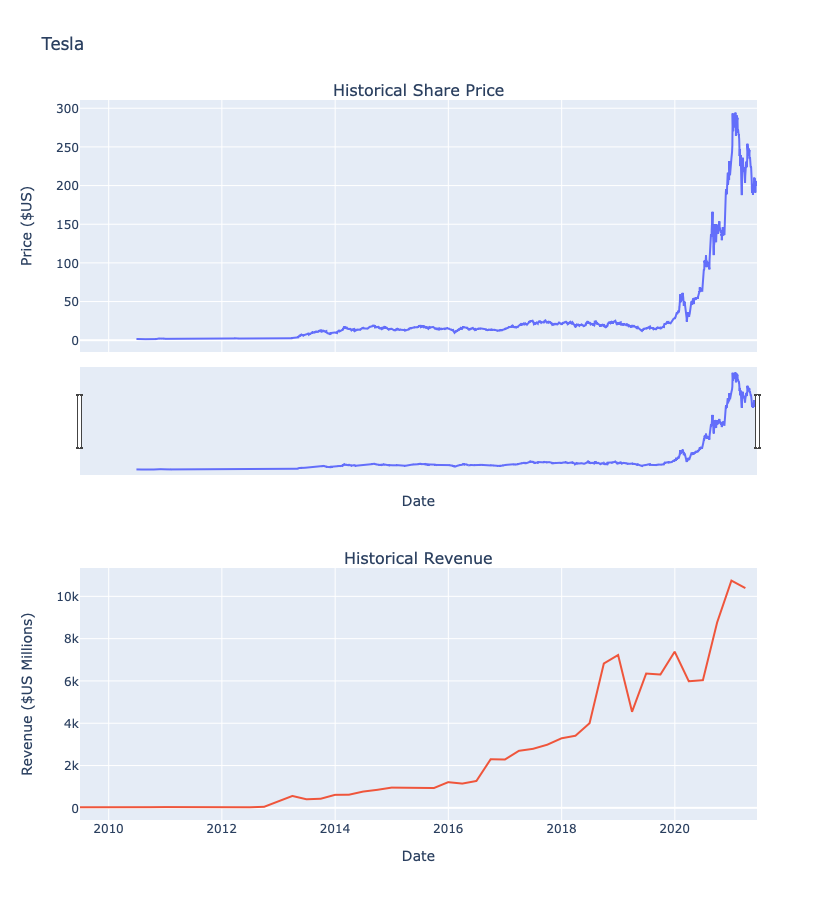

In [86]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


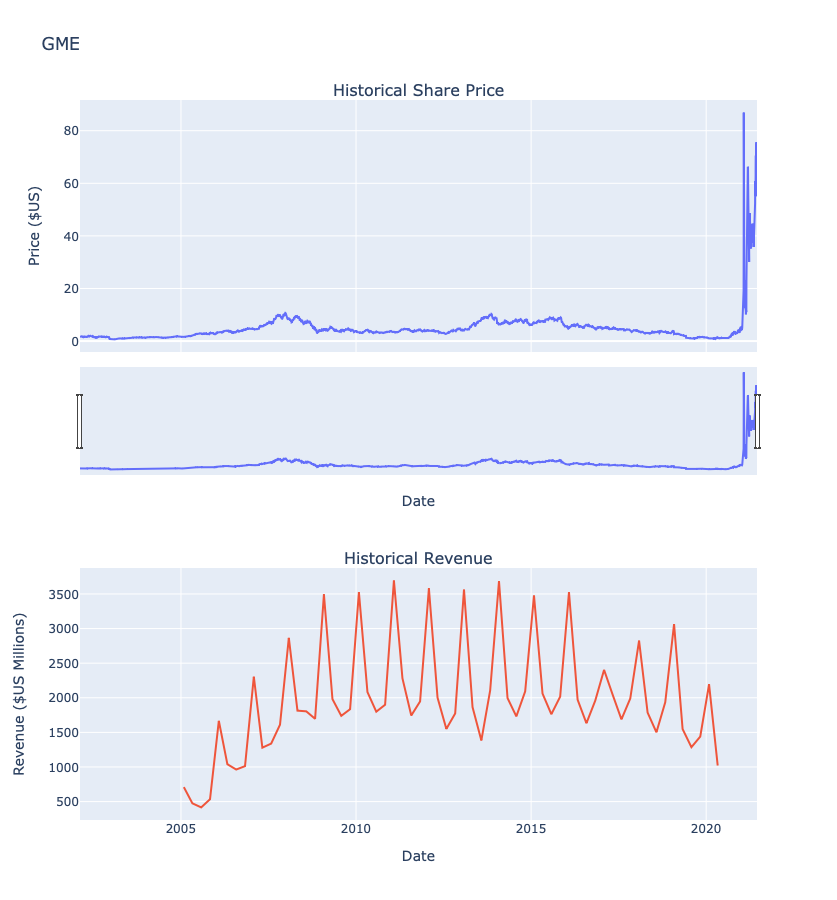

In [87]:
make_graph(gme_data, gme_revenue, 'GME')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
